## Exploring profiles of Psychological Optimal Functioning (FOP : Fonctionnement Optimal Psychologique) : Factor Scores

#### Methods used to compute factor scores in MPLUS are explained hereafter:
- Conceptually in the [MPLUS discussion groups](http://www.statmodel.com/discussion/messages/9/3778.html)
- In the technical notes [here](https://www.statmodel.com/download/techappen.pdf) or [here](https://www.statmodel.com/discussion/messages/9/8465.html)

### Step 1 : Preparing the Latent Class Data

In [6]:
# importing the basic packages for data exploration
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_info_columns', 1000)

In [7]:
# check current working directory
os.getcwd()

'd:\\Dropbox\\Projets\\Optimal Functioning\\RIPCO\\Person_Centered_Approach_2019_WLSMV\\Collecte_2013_N=1066\\python'

In [8]:
# check the files contained in the data folder
os.listdir('../data')

['Base_1066_recodee_2017-06.txt',
 'Bi_ESEM_FOP_4cl_agg_free.dat',
 'Bi_ESEM_FOP_4cl_free.dat',
 'Bi_ESEM_Fscores_1066.dat',
 'variable_names.txt']

In [9]:
# the data has no variables names so we need to provide these separately
var_names = ['POF','POSEM','NEGEM','FLOW','SELFDET','PERSEFF','STRENGTH','CPROB1','CPROB2','CPROB3','CPROB4','CL_POF','ID']

In [10]:
# import the data outputted by the latent class analysis - the separator (delimiter) uses one or several spaces
df = pd.read_csv('../data/Bi_ESEM_FOP_4cl_free.dat', sep='\s+', header = None, names=var_names )

In [11]:
# check the first few rows
df.head()

,POF,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH,CPROB1,CPROB2,CPROB3,CPROB4,CL_POF,ID
0,1.601,0.025,0.131,0.446,-0.020,-0.559,-0.220,0.013,0.0,0.900,0.087,3.0,303
1,-2.503,-1.433,-1.133,-0.144,-0.886,-2.131,-0.027,0.001,0.0,0.001,0.998,4.0,864
2,-0.797,-0.462,-0.058,-0.411,-0.273,0.688,-1.010,0.819,0.0,0.072,0.109,1.0,898
3,0.519,1.041,-0.841,-0.360,-2.028,1.721,1.203,0.000,0.0,0.004,0.996,4.0,162
4,0.631,-0.930,0.777,-0.735,-0.764,-2.280,-0.968,0.030,0.0,0.006,0.964,4.0,1204


### Step 2 : Visualize the factors scores as a function of the latent classes for interpretation

In [12]:
# generate a dataframe of the factor scores
factors_df = df.loc[:, ['POF','POSEM','NEGEM','FLOW','SELFDET','PERSEFF','STRENGTH','CL_POF']]

In [13]:
# aggregate the factors scores by mean
factors_means_df = factors_df.groupby(factors_df['CL_POF']).agg('mean')

In [14]:
factors_means_df

,POF,POSEM,NEGEM,FLOW,SELFDET,PERSEFF,STRENGTH
CL_POF,,,,,,,
1.0,-0.480224,0.013031,0.057621,-0.254086,-0.040283,-0.181393,-0.354562
2.0,0.384352,0.371241,0.186296,-0.220796,-0.081704,-0.047130,-0.428426
3.0,0.783962,0.197667,-0.309837,0.100253,0.471802,-0.012837,0.001469
4.0,-0.276249,-0.160700,0.240795,0.107982,-0.260382,0.142479,0.281615


In [15]:
# compute the proportion of each class
factors_df.groupby(factors_df['CL_POF']).size() / len(factors_df)

CL_POF
1.0    0.272045
2.0    0.050657
3.0    0.270169
4.0    0.407129
dtype: float64

In [16]:
# alternatively
factors_df['CL_POF'].value_counts().sort_index(), factors_df['CL_POF'].value_counts(normalize=True).sort_index()

(1.0    290
 2.0     54
 3.0    288
 4.0    434
 Name: CL_POF, dtype: int64,
 1.0    0.272045
 2.0    0.050657
 3.0    0.270169
 4.0    0.407129
 Name: CL_POF, dtype: float64)

In [17]:
# renames the classes according to the profiles for a more explicit labeling
factors_means_df.rename(index={1.0:"Fully Dysfunctioning\n27.20%",2.0:"Emotionally Functioning\n5.07%",3.0:"Self-Motivated Functioning\n27.02%",4.0:"Resilient Dysfunctioning\n40.71%"}, inplace=True)

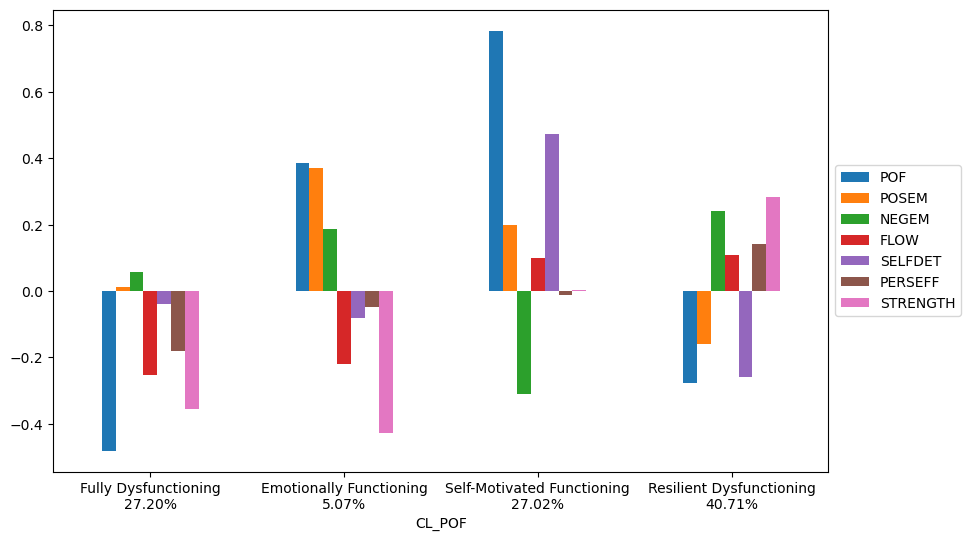

In [18]:
# plot the profiles
factors_means_df.plot(kind='bar', figsize=(10,6))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xticks(rotation=0)
plt.show()

## Merging the latent class & factors data with the raw data to better understand the latent class profiles

### Step 1 : Merging the datasets

In [19]:
# import the raw datafile n =1066
raw_df = pd.read_csv('../data/Base_1066_recodee_2017-06.txt', sep = '\s+', encoding='ansi', na_values=999)

In [20]:
# check data structure
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 222 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    Id           1066 non-null   int64  
 1    Sexe         1066 non-null   int64  
 2    Age          1066 non-null   int64  
 3    Situfam      1066 non-null   int64  
 4    Enfant       1066 non-null   int64  
 5    Situpro      1066 non-null   int64  
 6    Typecontrat  1066 non-null   int64  
 7    Jourabsence  1065 non-null   float64
 8    Revenus      1066 non-null   int64  
 9    Nivetude     1066 non-null   int64  
 10   Taillentrep  1066 non-null   int64  
 11   Manager      1066 non-null   int64  
 12   CSP1         1066 non-null   int64  
 13   CSP2         1066 non-null   int64  
 14   Secteur      1066 non-null   int64  
 15   CodePostal   1062 non-null   float64
 16   ZoneFR1      1066 non-null   int64  
 17   ZoneFR2      1066 non-null   int64  
 18   MHCA1        1054 non-null

In [21]:
# Recode the Demarche Column
raw_df.rename(columns={'DÃ.marche':'Demarche'}, inplace=True)
raw_df.columns[196]

'Force9'

In [22]:
# select the sociodemographic & psychosocial risks variables
raw_var_names = ['Id','Sexe','Age','Situfam','Situpro','Revenus','Nivetude','Taillentrep','Manager','CSP1','CSP2','Secteur','ZoneFR1','ZoneFR2','Demarche','Jourabsence','cabs7','cabs1','cabs2','abs8','abs10']

In [23]:
# subselect a new dataframe
rps_df = raw_df[raw_var_names]

In [24]:
# replace variables to be consistent with previous research
rps_df.rename(columns={'Jourabsence':'GenAbs','cabs7':'ManAbs','cabs1':'PhysPres','cabs2':'PsycPres','abs8':'Turnover','abs10':'Unhappy'}, inplace=True)

C:\Users\Franck\AppData\Local\Temp\ipykernel_22504\1195482037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rps_df.rename(columns={'Jourabsence':'GenAbs','cabs7':'ManAbs','cabs1':'PhysPres','cabs2':'PsycPres','abs8':'Turnover','abs10':'Unhappy'}, inplace=True)


In [25]:
# chek the first few rows
rps_df.head()

,Id,Sexe,Age,Situfam,Situpro,Revenus,Nivetude,Taillentrep,Manager,CSP1,...,Secteur,ZoneFR1,ZoneFR2,Demarche,GenAbs,ManAbs,PhysPres,PsycPres,Turnover,Unhappy
0,303,2,43,1,2,2,2,1,1,5,...,11,5,8,2,1.0,0,7,10,3.0,2.0
1,864,1,56,2,2,3,2,1,1,6,...,5,4,7,2,1.0,0,7,10,5.0,5.0
2,898,2,40,2,2,1,4,6,1,5,...,4,1,1,2,3.0,1,7,10,4.0,3.0
3,162,2,57,1,2,3,3,5,1,6,...,11,3,6,1,1.0,0,7,10,5.0,5.0
4,1204,1,25,1,2,3,3,6,1,5,...,3,1,1,1,1.0,0,7,10,5.0,5.0


In [26]:
# merge...!
data = pd.merge(rps_df,df, left_on="Id",right_on="ID").drop(columns=['ID'])

In [27]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 0 to 1065
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1066 non-null   int64  
 1   Sexe         1066 non-null   int64  
 2   Age          1066 non-null   int64  
 3   Situfam      1066 non-null   int64  
 4   Situpro      1066 non-null   int64  
 5   Revenus      1066 non-null   int64  
 6   Nivetude     1066 non-null   int64  
 7   Taillentrep  1066 non-null   int64  
 8   Manager      1066 non-null   int64  
 9   CSP1         1066 non-null   int64  
 10  CSP2         1066 non-null   int64  
 11  Secteur      1066 non-null   int64  
 12  ZoneFR1      1066 non-null   int64  
 13  ZoneFR2      1066 non-null   int64  
 14  Demarche     1066 non-null   int64  
 15  GenAbs       1065 non-null   float64
 16  ManAbs       1066 non-null   int64  
 17  PhysPres     1066 non-null   int64  
 18  PsycPres     1066 non-null   int64  
 19  Turnov

In [28]:
# check missing values
data.isnull().sum()

Id             0
Sexe           0
Age            0
Situfam        0
Situpro        0
Revenus        0
Nivetude       0
Taillentrep    0
Manager        0
CSP1           0
CSP2           0
Secteur        0
ZoneFR1        0
ZoneFR2        0
Demarche       0
GenAbs         1
ManAbs         0
PhysPres       0
PsycPres       0
Turnover       3
Unhappy        5
POF            0
POSEM          0
NEGEM          0
FLOW           0
SELFDET        0
PERSEFF        0
STRENGTH       0
CPROB1         0
CPROB2         0
CPROB3         0
CPROB4         0
CL_POF         0
dtype: int64

### Step 2 Explore profiles of psychosocial risks associated to latent classes

In [29]:
try:
    import pingouin as pg
except:
    !pip install pingouin
    import pandas as pg

In [30]:
# anova on CL_POF
anova_df = data.iloc[:, [15,16,17,18,19,20,32]]
anova_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 0 to 1065
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GenAbs    1065 non-null   float64
 1   ManAbs    1066 non-null   int64  
 2   PhysPres  1066 non-null   int64  
 3   PsycPres  1066 non-null   int64  
 4   Turnover  1063 non-null   float64
 5   Unhappy   1061 non-null   float64
 6   CL_POF    1066 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 66.6 KB


c:\Users\Franck\.conda\envs\machine_learning\Lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [31]:
# remove missing values
anova_df.dropna(inplace=True)
anova_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 0 to 1065
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GenAbs    1058 non-null   float64
 1   ManAbs    1058 non-null   int64  
 2   PhysPres  1058 non-null   int64  
 3   PsycPres  1058 non-null   int64  
 4   Turnover  1058 non-null   float64
 5   Unhappy   1058 non-null   float64
 6   CL_POF    1058 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 66.1 KB


C:\Users\Franck\AppData\Local\Temp\ipykernel_22504\3531139633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anova_df.dropna(inplace=True)


In [32]:
# recode the classes
anova_df['CL_POF'].replace({1.0:"Fully Dysfunctioning",2.0:"Emotionally Functioning",3.0:"Self-Motivated Functioning",4.0:"Resilient Dysfunctioning"}, inplace=True)
anova_df.head()

C:\Users\Franck\AppData\Local\Temp\ipykernel_22504\2270775031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anova_df['CL_POF'].replace({1.0:"Fully Dysfunctioning",2.0:"Emotionally Functioning",3.0:"Self-Motivated Functioning",4.0:"Resilient Dysfunctioning"}, inplace=True)


,GenAbs,ManAbs,PhysPres,PsycPres,Turnover,Unhappy,CL_POF
0,1.0,0,7,10,3.0,2.0,Self-Motivated Functioning
1,1.0,0,7,10,5.0,5.0,Resilient Dysfunctioning
2,3.0,1,7,10,4.0,3.0,Fully Dysfunctioning
3,1.0,0,7,10,5.0,5.0,Resilient Dysfunctioning
4,1.0,0,7,10,5.0,5.0,Resilient Dysfunctioning


In [33]:
# Initialize results dictionary
results = {}

# Perform ANOVA and post hoc tests for each quantitative variable
for col in anova_df.columns[:-1]:  # Assuming the first column is the group
    # Perform ANOVA
    aov = pg.anova(dv=col, between='CL_POF', data=anova_df, detailed=True)
    
    # Perform post hoc tests (Tukey's HSD)
    post_hoc = pg.pairwise_tests(data=anova_df, dv=col, between="CL_POF", subject=None, padjust="bonf", effsize="cohen")
    
    # Store results
    results[col] = {
        'ANOVA': aov,
        'Post_hoc': post_hoc,
    }

# Display results
for var, res in results.items():
    display(f"Results for {var}:")
    display("ANOVA results:")
    display(res['ANOVA'])
    display("Post hoc test results:")
    display(res['Post_hoc'])
    print("===================================================================")

'Results for GenAbs:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_POF,19.968947,3,6.656316,2.99606,0.029905,0.008456
1,Within,2341.660543,1054,2.221689,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_POF,Emotionally Functioning,Fully Dysfunctioning,False,True,-0.965619,86.262854,two-sided,0.336934,1.000000,bonf,0.248,-0.124128
1,CL_POF,Emotionally Functioning,Resilient Dysfunctioning,False,True,-2.253110,86.921159,two-sided,0.026769,0.160616,bonf,1.668,-0.237784
2,CL_POF,Emotionally Functioning,Self-Motivated Functioning,False,True,-0.590446,81.789140,two-sided,0.556520,1.000000,bonf,0.189,-0.079551
3,CL_POF,Fully Dysfunctioning,Resilient Dysfunctioning,False,True,-1.931564,688.052907,two-sided,0.053824,0.322942,bonf,0.526,-0.141467
4,CL_POF,Fully Dysfunctioning,Self-Motivated Functioning,False,True,0.594558,570.554853,two-sided,0.552375,1.000000,bonf,0.11,0.049584
5,CL_POF,Resilient Dysfunctioning,Self-Motivated Functioning,False,True,2.588749,701.932941,two-sided,0.009832,0.058992,bonf,2.235,0.187284


'Results for ManAbs:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_POF,111.716942,3,37.238981,6.49578,0.000235,0.018153
1,Within,6042.367179,1054,5.732796,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_POF,Emotionally Functioning,Fully Dysfunctioning,False,True,-1.809733,83.370717,two-sided,0.073941,0.443645,bonf,0.735,-0.239367
1,CL_POF,Emotionally Functioning,Resilient Dysfunctioning,False,True,-3.454606,84.081270,two-sided,0.000866,0.005195,bonf,40.227,-0.375430
2,CL_POF,Emotionally Functioning,Self-Motivated Functioning,False,True,-1.075536,80.032863,two-sided,0.285366,1.000000,bonf,0.275,-0.147837
3,CL_POF,Fully Dysfunctioning,Resilient Dysfunctioning,False,True,-2.551263,688.650460,two-sided,0.010948,0.065690,bonf,2.034,-0.186774
4,CL_POF,Fully Dysfunctioning,Self-Motivated Functioning,False,True,1.188139,571.419742,two-sided,0.235272,1.000000,bonf,0.185,0.099088
5,CL_POF,Resilient Dysfunctioning,Self-Motivated Functioning,False,True,3.803999,699.894441,two-sided,0.000155,0.000929,bonf,95.596,0.275747


'Results for PhysPres:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_POF,248.670968,3,82.890323,19.651422,2.119911e-12,0.052971
1,Within,4445.805403,1054,4.218032,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_POF,Emotionally Functioning,Fully Dysfunctioning,False,True,-1.324457,78.449782,two-sided,1.891970e-01,1.000000e+00,bonf,0.363,-0.185318
1,CL_POF,Emotionally Functioning,Resilient Dysfunctioning,False,True,-3.430973,76.820070,two-sided,9.709506e-04,5.825704e-03,bonf,37.308,-0.408836
2,CL_POF,Emotionally Functioning,Self-Motivated Functioning,False,True,0.849625,68.713648,two-sided,3.984844e-01,1.000000e+00,bonf,0.225,0.139170
3,CL_POF,Fully Dysfunctioning,Resilient Dysfunctioning,False,True,-3.518608,677.007078,two-sided,4.628424e-04,2.777054e-03,bonf,34.904,-0.259587
4,CL_POF,Fully Dysfunctioning,Self-Motivated Functioning,False,True,3.937020,545.928595,two-sided,9.317463e-05,5.590478e-04,bonf,163.735,0.328241
5,CL_POF,Resilient Dysfunctioning,Self-Motivated Functioning,False,True,7.930120,713.952545,two-sided,8.448640e-15,5.069184e-14,bonf,6.368e+11,0.561260


'Results for PsycPres:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_POF,993.207868,3,331.069289,35.600731,6.441742e-22,0.092007
1,Within,9801.681546,1054,9.299508,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_POF,Emotionally Functioning,Fully Dysfunctioning,False,True,-3.985376,85.556227,two-sided,1.412401e-04,8.474405e-04,bonf,240.043,-0.515757
1,CL_POF,Emotionally Functioning,Resilient Dysfunctioning,False,True,-7.055180,77.477048,two-sided,6.364096e-10,3.818457e-09,bonf,1.098e+09,-0.832665
2,CL_POF,Emotionally Functioning,Self-Motivated Functioning,False,True,-1.362471,74.994997,two-sided,1.771271e-01,1.000000e+00,bonf,0.381,-0.200111
3,CL_POF,Fully Dysfunctioning,Resilient Dysfunctioning,False,True,-4.647292,640.700708,two-sided,4.084530e-06,2.450718e-05,bonf,2904.418,-0.349752
4,CL_POF,Fully Dysfunctioning,Self-Motivated Functioning,False,True,4.389248,555.021712,two-sided,1.361969e-05,8.171814e-05,bonf,980.497,0.365972
5,CL_POF,Resilient Dysfunctioning,Self-Motivated Functioning,False,True,9.854596,697.086164,two-sided,1.547358e-21,9.284149e-21,bonf,2.562e+18,0.716160


'Results for Turnover:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_POF,308.542075,3,102.847358,68.211736,2.576795e-40,0.162585
1,Within,1589.185713,1054,1.507766,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_POF,Emotionally Functioning,Fully Dysfunctioning,False,True,-3.498036,77.547485,two-sided,7.794149e-04,4.676490e-03,bonf,45.518,-0.495156
1,CL_POF,Emotionally Functioning,Resilient Dysfunctioning,False,True,-6.006943,74.306515,two-sided,6.456653e-08,3.873992e-07,bonf,2.479e+06,-0.744796
2,CL_POF,Emotionally Functioning,Self-Motivated Functioning,False,True,1.933359,73.419367,two-sided,5.704780e-02,3.422868e-01,bonf,0.911,0.290878
3,CL_POF,Fully Dysfunctioning,Resilient Dysfunctioning,False,True,-4.242998,665.523377,two-sided,2.518478e-05,1.511087e-04,bonf,520.96,-0.315160
4,CL_POF,Fully Dysfunctioning,Self-Motivated Functioning,False,True,9.473405,568.904512,two-sided,7.192027e-20,4.315216e-19,bonf,5.769e+16,0.790016
5,CL_POF,Resilient Dysfunctioning,Self-Motivated Functioning,False,True,14.266081,690.123443,two-sided,1.181548e-40,7.089287e-40,bonf,2.231e+37,1.042571


'Results for Unhappy:'

'ANOVA results:'

,Source,SS,DF,MS,F,p-unc,np2
0,CL_POF,363.304805,3,121.101602,95.021867,1.957395e-54,0.212884
1,Within,1343.281206,1054,1.274460,NaN,NaN,NaN


'Post hoc test results:'

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,CL_POF,Emotionally Functioning,Fully Dysfunctioning,False,True,-4.594713,86.523047,two-sided,1.464136e-05,8.784815e-05,bonf,2554.31,-0.589209
1,CL_POF,Emotionally Functioning,Resilient Dysfunctioning,False,True,-7.068287,88.045255,two-sided,3.531875e-10,2.119125e-09,bonf,1.192e+09,-0.737949
2,CL_POF,Emotionally Functioning,Self-Motivated Functioning,False,True,3.473827,70.601327,two-sided,8.807523e-04,5.284514e-03,bonf,42.13,0.548461
3,CL_POF,Fully Dysfunctioning,Resilient Dysfunctioning,False,True,-3.709353,690.997043,two-sided,2.244734e-04,1.346841e-03,bonf,67.84,-0.271092
4,CL_POF,Fully Dysfunctioning,Self-Motivated Functioning,False,True,13.428107,527.897743,two-sided,1.418274e-35,8.509643e-35,bonf,3.417e+32,1.119407
5,CL_POF,Resilient Dysfunctioning,Self-Motivated Functioning,False,True,17.512854,705.379834,two-sided,2.732461e-57,1.639476e-56,bonf,5.776e+53,1.214580


In [34]:
# standardize the data
from scipy.stats import zscore
data_std = data[['GenAbs','ManAbs','PhysPres','PsycPres','Turnover','Unhappy']].dropna().apply(zscore)

In [35]:
# aggregate by latent classes
group_rps_std = data_std.groupby(factors_df['CL_POF']).agg('mean')

In [36]:
group_rps_std

,GenAbs,ManAbs,PhysPres,PsycPres,Turnover,Unhappy
CL_POF,,,,,,
1.0,-0.042971,-0.044516,-0.025779,-0.029714,0.081458,0.145580
2.0,-0.155299,-0.259989,-0.199957,-0.521051,-0.353232,-0.345615
3.0,-0.087581,-0.133310,-0.307904,-0.358822,-0.590076,-0.697640
4.0,0.106987,0.151795,0.248463,0.325585,0.384537,0.412491


In [37]:
group_rps_std.rename(index={1.0:"Fully Dysfunctioning\n27.20%",2.0:"Emotionally Functioning\n5.07%",3.0:"Self-Motivated Functioning\n27.02%",4.0:"Resilient Dysfunctioning\n40.71%"}, inplace=True)

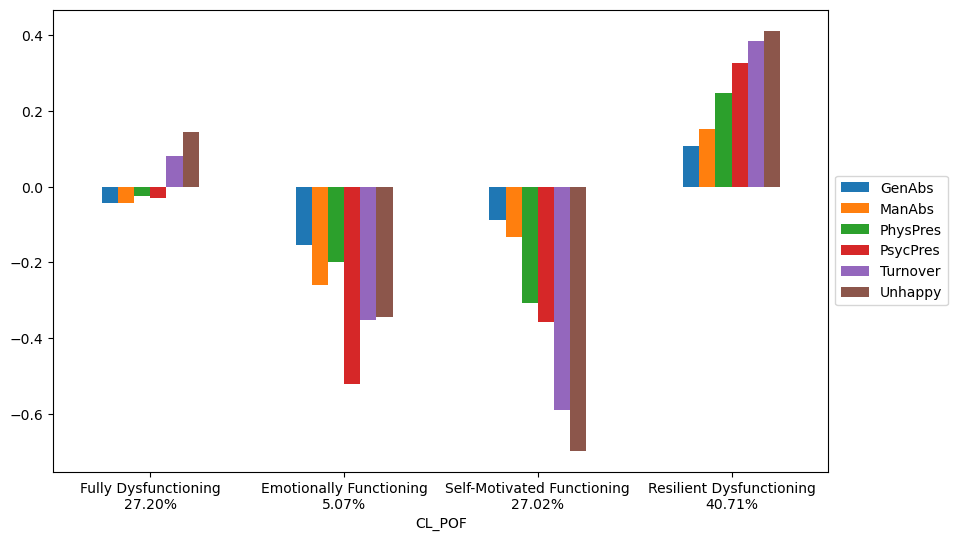

In [38]:
# plot the standardized PSR item scores per latent class
group_rps_std.plot(kind='bar', figsize=(10,6))
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xticks(rotation=0)
plt.show()

### Step 3 : Explore profiles of FOP by Socio Demographic variables

In [39]:
socdem_df = data.iloc[:,[1,3,4,5,6,7,8,9,10,11,12,13,14,32]]

In [40]:
socdem_df.info()
socdem_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1066 entries, 0 to 1065
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sexe         1066 non-null   int64  
 1   Situfam      1066 non-null   int64  
 2   Situpro      1066 non-null   int64  
 3   Revenus      1066 non-null   int64  
 4   Nivetude     1066 non-null   int64  
 5   Taillentrep  1066 non-null   int64  
 6   Manager      1066 non-null   int64  
 7   CSP1         1066 non-null   int64  
 8   CSP2         1066 non-null   int64  
 9   Secteur      1066 non-null   int64  
 10  ZoneFR1      1066 non-null   int64  
 11  ZoneFR2      1066 non-null   int64  
 12  Demarche     1066 non-null   int64  
 13  CL_POF       1066 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 124.9 KB


,Sexe,Situfam,Situpro,Revenus,Nivetude,Taillentrep,Manager,CSP1,CSP2,Secteur,ZoneFR1,ZoneFR2,Demarche,CL_POF
0,2,1,2,2,2,1,1,5,56,11,5,8,2,3.0
1,1,2,2,3,2,1,1,6,63,5,4,7,2,4.0
2,2,2,2,1,4,6,1,5,54,4,1,1,2,1.0
3,2,1,2,3,3,5,1,6,65,11,3,6,1,4.0
4,1,1,2,3,3,6,1,5,55,3,1,1,1,4.0


In [41]:
# recoding all categorical variables

socdem_df['Sexe'].replace({1:"Male",2:"Female"}, inplace=True)
socdem_df['Situfam'].replace({1:"Single", 2:"Couple"}, inplace=True)
socdem_df['Situpro'].replace({1:"Self-employed ", 2:"Salary Employed", 5:"Transition"}, inplace=True)
socdem_df['Revenus'].replace({1: "< 6000€",
    2: "6000 to 11900€",
    3: "11901 to 26490€",
    4: "26491 to 70900€",
    5: "70901 to 150000€",
    6: "more than 150000€"}, inplace=True)
socdem_df['Nivetude'].replace({1: "Without a diploma or Middle School Certificate",
    2: "CAP/BEP: Vocational certificate",
    3: "2 years of higher education",
    4: "3 years of higher education",
    5: "4 years of higher education",
    6: "Master's degree or higher"}, inplace=True)
socdem_df['Taillentrep'].replace({    1: "< 10 employees",
    2: "10 to 49 employees",
    3: "50 to 199 employees",
    4: "200 to 499 employees",
    5: "500 to 2000 employees",
    6: "2000+ employees"},inplace=True)
socdem_df['Manager'].replace({1:"No", 2:"Middle Manager", 3:"Senior Manager", 4:"Business Owner"},inplace=True)
socdem_df['CSP1'].replace({1:"Farmers",
    2: "Artisans, traders and business leaders",
    3: "Executives, higher intellectual professions...",
    4: "Intermediate professions",
    5: "Employees",
    6: "Workers"},inplace=True)
socdem_df['CSP2'].replace({
    10: "Farmers",
    21: "Craftsmen",
    22: "Shopkeepers and related occupations",
    23: "Business owners with 10 or more employees",
    31: "Liberal professions",
    33: "Public service executives",
    34: "Teachers, scientific professions",
    35: "Information, arts, and entertainment professions",
    37: "Administrative and commercial managers of businesses",
    38: "Engineers and technical managers of businesses",
    42: "Primary school teachers and related professions",
    43: "Intermediate professions in health and social work",
    44: "Clergy, religious workers",
    45: "Intermediate administrative professions in the public service",
    46: "Intermediate administrative and commercial professions in businesses",
    47: "Technicians (except tertiary technicians)",
    48: "Foremen, supervisors (excluding administrative supervisors)",
    52: "Civil employees and service agents in the public service",
    53: "Security agents",
    54: "Administrative employees of businesses",
    55: "Sales employees",
    56: "Personal service workers",
    62: "Skilled industrial workers",
    63: "Skilled craft workers",
    64: "Drivers",
    65: "Skilled handlers, warehouse and transport workers",
    67: "Unskilled industrial workers",
    68: "Unskilled craft workers",
    69: "Agricultural workers and related occupations"
}
, inplace=True)
socdem_df['Secteur'].replace({
    1: "Industry",
    2: "Construction",
    3: "Commerce and repair",
    4: "Transportation and storage",
    5: "Accommodation and food services",
    6: "Information and communication",
    7: "Financial and insurance activities",
    8: "Real estate activities",
    9: "Business support services",
    10: "Education, health, and social work",
    11: "Household services",
    12: "Other"
}
,inplace=True)
socdem_df['ZoneFR1'].replace({
    0: np.nan,
    1: "Île-de-France",
    2: "North-West",
    3: "North-East",
    4: "South-West",
    5: "South-East"
}
, inplace=True)
socdem_df['ZoneFR2'].replace({
    0: np.nan,
    1: "Île-de-France",
    2: "Western Paris Suburbs",
    3: "West",
    4: "North",
    5: "East",
    6: "Eastern Paris Suburbs",
    7: "South-West",
    8: "Central-East",
    9: "Mediterranean"
}
,inplace=True)
socdem_df['Demarche'].replace({1:'Yes', 2:'No'},inplace=True)

C:\Users\Franck\AppData\Local\Temp\ipykernel_22504\163808610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socdem_df['Sexe'].replace({1:"Male",2:"Female"}, inplace=True)
C:\Users\Franck\AppData\Local\Temp\ipykernel_22504\163808610.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socdem_df['Situfam'].replace({1:"Single", 2:"Couple"}, inplace=True)
C:\Users\Franck\AppData\Local\Temp\ipykernel_22504\163808610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [42]:
# recoding the latent classes categories
socdem_df['CL_POF'].replace({1.0:"Fully Dysfunctioning",2.0:"Emotionally Functioning",3.0:"Self-Motivated Functioning",4.0:"Resilient Dysfunctioning"}, inplace=True)

C:\Users\Franck\AppData\Local\Temp\ipykernel_22504\2444020943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  socdem_df['CL_POF'].replace({1.0:"Fully Dysfunctioning",2.0:"Emotionally Functioning",3.0:"Self-Motivated Functioning",4.0:"Resilient Dysfunctioning"}, inplace=True)


In [43]:
# check
socdem_df.head()

,Sexe,Situfam,Situpro,Revenus,Nivetude,Taillentrep,Manager,CSP1,CSP2,Secteur,ZoneFR1,ZoneFR2,Demarche,CL_POF
0,Female,Single,Salary Employed,6000 to 11900€,CAP/BEP: Vocational certificate,< 10 employees,No,Employees,Personal service workers,Household services,South-East,Central-East,No,Self-Motivated Functioning
1,Male,Couple,Salary Employed,11901 to 26490€,CAP/BEP: Vocational certificate,< 10 employees,No,Workers,Skilled craft workers,Accommodation and food services,South-West,South-West,No,Resilient Dysfunctioning
2,Female,Couple,Salary Employed,< 6000€,3 years of higher education,2000+ employees,No,Employees,Administrative employees of businesses,Transportation and storage,Île-de-France,Île-de-France,No,Fully Dysfunctioning
3,Female,Single,Salary Employed,11901 to 26490€,2 years of higher education,500 to 2000 employees,No,Workers,"Skilled handlers, warehouse and transport workers",Household services,North-East,Eastern Paris Suburbs,Yes,Resilient Dysfunctioning
4,Male,Single,Salary Employed,11901 to 26490€,2 years of higher education,2000+ employees,No,Employees,Sales employees,Commerce and repair,Île-de-France,Île-de-France,Yes,Resilient Dysfunctioning


In [44]:
# save in a new data frame
socdem_data = socdem_df.copy()

In [45]:
""" def con_table(row_var,col_var):
    import pandas as pd
    import numpy as np
    from scipy.stats import chi2_contingency
    
    obs_df = pd.crosstab(row_var, col_var, margins=True)
    obs = obs_df.iloc[0:-1,0:-1]
    chi2, p, dof, exp = chi2_contingency(obs)
    exp = pd.DataFrame(exp, index=obs.index, columns=obs.columns)
    res = (obs-exp)/np.sqrt(exp)
    
    return obs, exp, res, chi2, p, dof """

' def con_table(row_var,col_var):\n    import pandas as pd\n    import numpy as np\n    from scipy.stats import chi2_contingency\n    \n    obs_df = pd.crosstab(row_var, col_var, margins=True)\n    obs = obs_df.iloc[0:-1,0:-1]\n    chi2, p, dof, exp = chi2_contingency(obs)\n    exp = pd.DataFrame(exp, index=obs.index, columns=obs.columns)\n    res = (obs-exp)/np.sqrt(exp)\n    \n    return obs, exp, res, chi2, p, dof '

In [46]:
""" def plot_con_table(obs, size=(10, 8)):

    import matplotlib.pyplot as plt
    
   
    # Plotting the side-by-side bar chart
    obs.plot(kind='bar', stacked=False, figsize=size)
    plt.xlabel(row_var)
    plt.ylabel(col_var)
    plt.title(f'Side-by-Side Bar Chart of {col_var} by {row_var}')
    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary
    plt.show() """

" def plot_con_table(obs, size=(10, 8)):\n\n    import matplotlib.pyplot as plt\n    \n   \n    # Plotting the side-by-side bar chart\n    obs.plot(kind='bar', stacked=False, figsize=size)\n    plt.xlabel(row_var)\n    plt.ylabel(col_var)\n    plt.title(f'Side-by-Side Bar Chart of {col_var} by {row_var}')\n    plt.xticks(rotation=0)  # Rotate x-axis labels if necessary\n    plt.show() "

In [47]:
def con_table(row_var,col_var, pearson = False):
    import pandas as pd
    import numpy as np
    from scipy.stats import chi2_contingency
    import statsmodels.api as sm
    
    obs = pd.crosstab(row_var, col_var)
    chi2, p, dof, exp = chi2_contingency(obs)
    table = sm.stats.Table(obs)
    obs = table.table_orig
    exp = table.fittedvalues

    if pearson :
        res = table.resid_pearson
    else :
        res = table.standardized_resids
    
    return obs, exp, res, chi2, p, dof

In [48]:
# plot residuals
def res_plot(res, row_var, col_var, size = (10,7), loc='lower center') :
    from scipy.stats import norm

    # Calculate the normal quantile for the given probability
    quantile_0_05 = norm.ppf(0.025)
    quantile_0_10 = norm.ppf(0.05)
    res.plot(kind = 'bar', figsize = size)
    plt.title(f'Residual plot of {col_var} as a function of {row_var}')
    plt.axhline(y=-quantile_0_05, color='r', linestyle='', linewidth=1, label = f'p_value : {p:.3f}')
    plt.axhline(y=-quantile_0_05, color='r', linestyle='--', linewidth=1)    
    plt.axhline(y=quantile_0_05, color='r', linestyle='--', linewidth=1, label='alpha=0.05 Significance Threshold')
    plt.axhline(y=-quantile_0_10, color='grey', linestyle='--', linewidth=1)    
    plt.axhline(y=quantile_0_10, color='grey', linestyle='--', linewidth=1, label='alpha=0.10 Significance Threshold')    
    plt.xlabel(row_var)
    plt.ylabel('Standardized Residuals')
    plt.legend(loc=loc, bbox_to_anchor=(1.20,0.35))
    plt.xticks(rotation=90)
    plt.show()

In [49]:
socdem_data.columns[:-1]

Index(['Sexe', 'Situfam', 'Situpro', 'Revenus', 'Nivetude', 'Taillentrep',
       'Manager', 'CSP1', 'CSP2', 'Secteur', 'ZoneFR1', 'ZoneFR2', 'Demarche'],
      dtype='object')

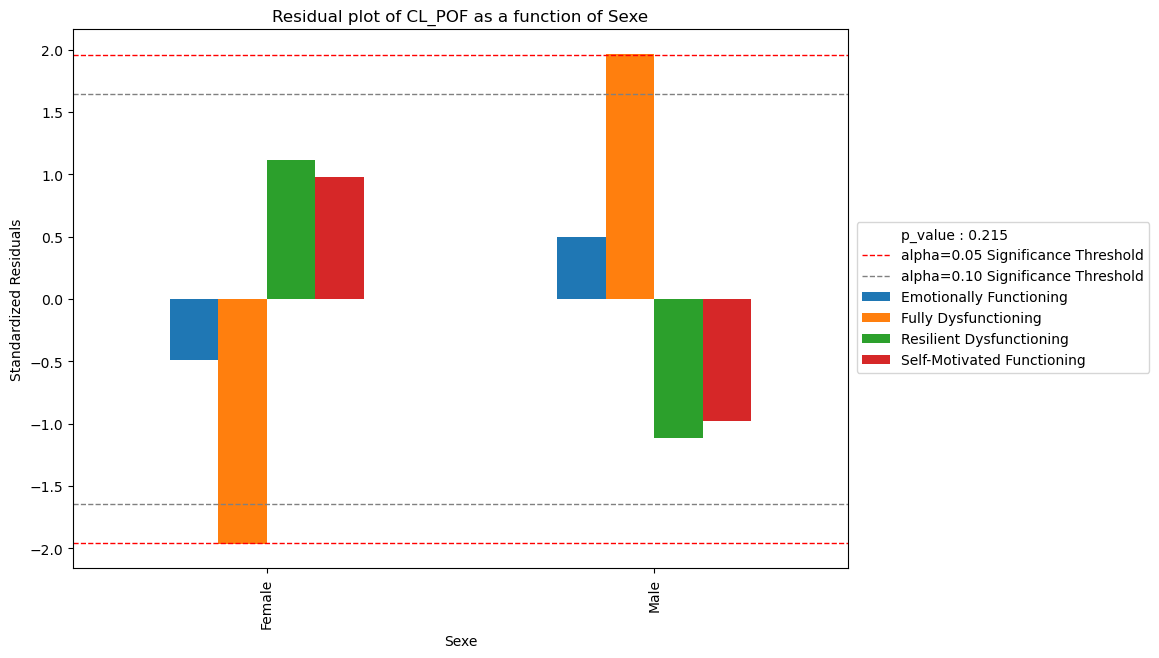

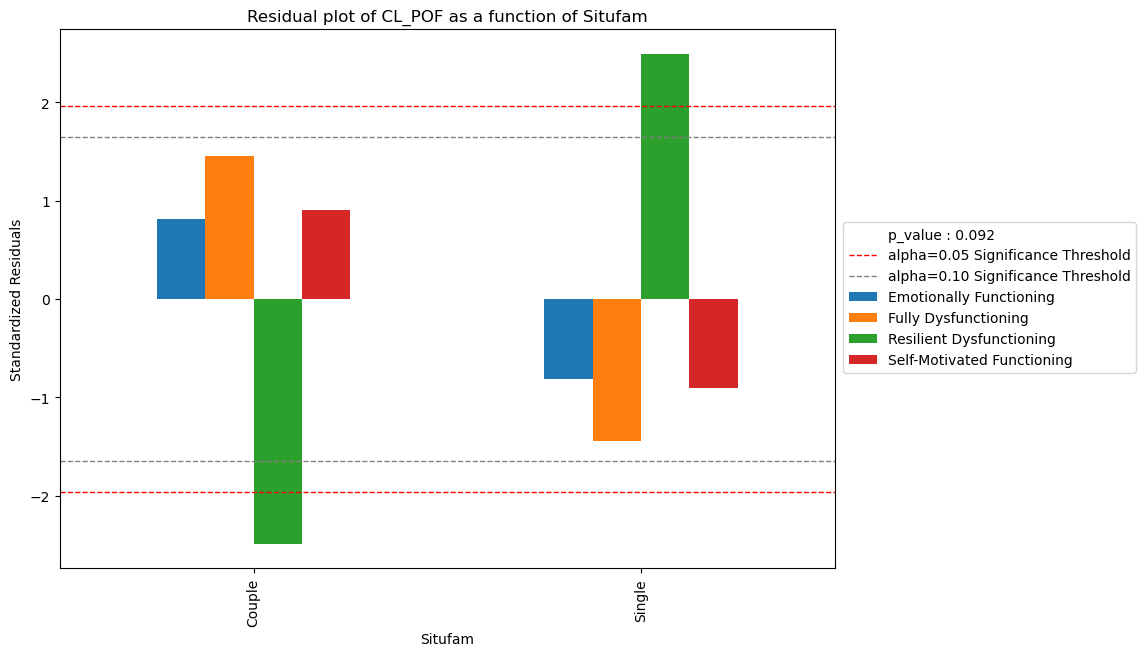

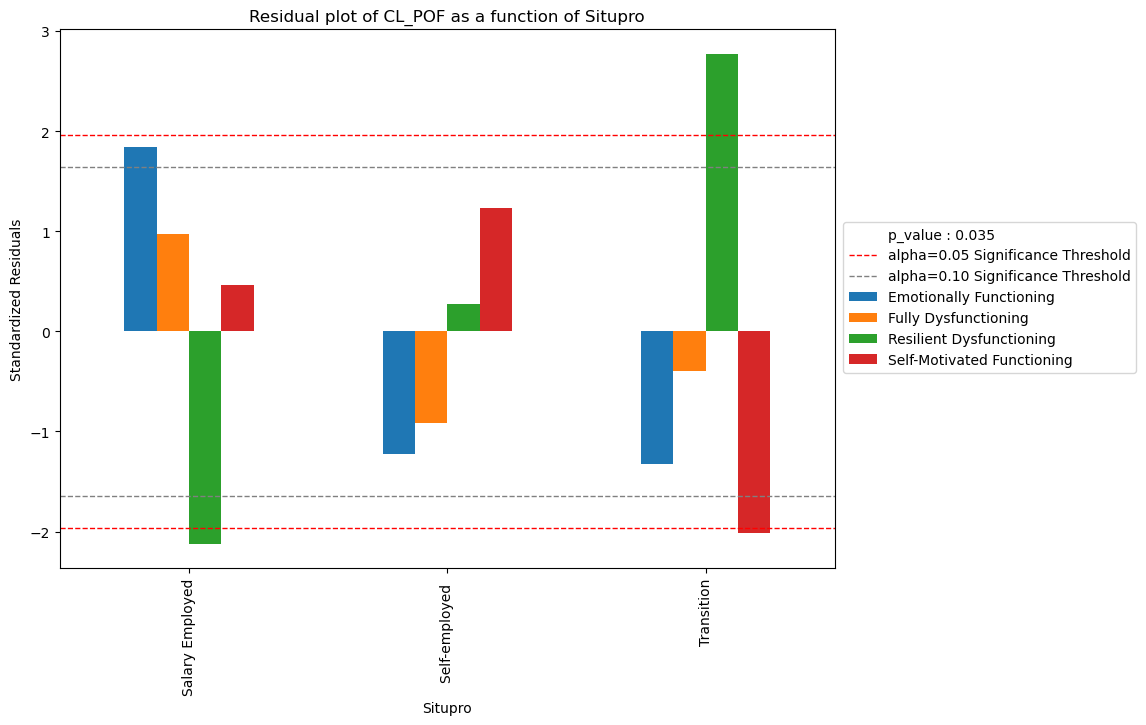

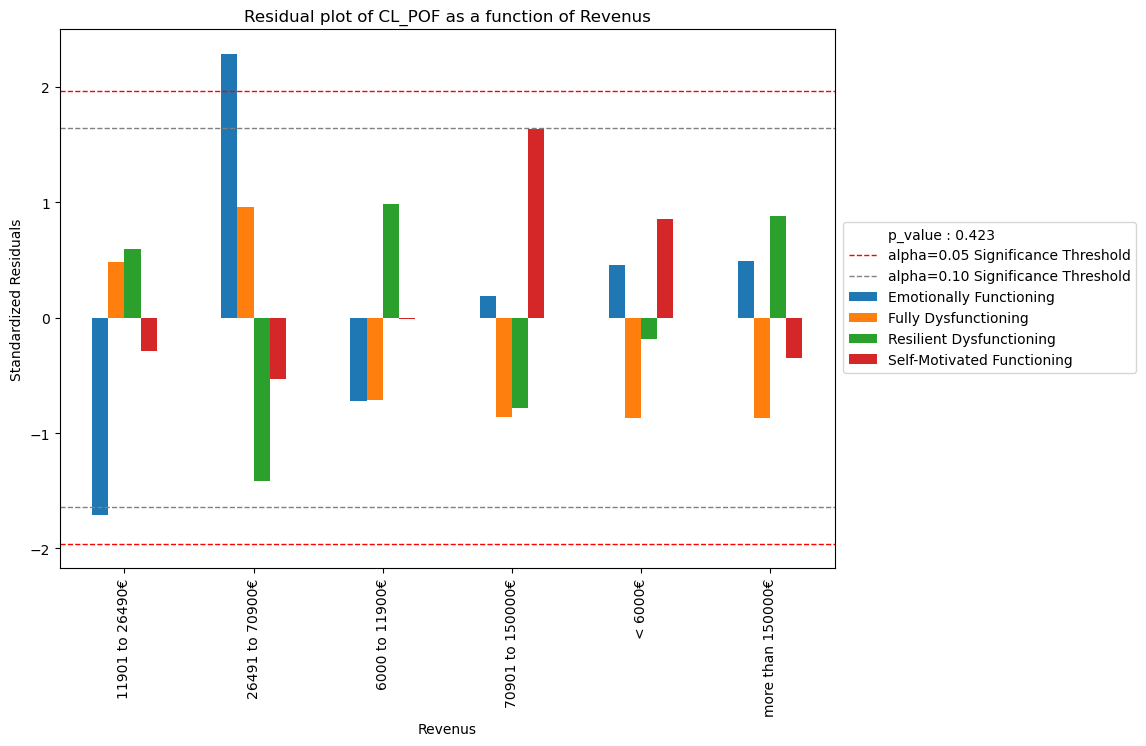

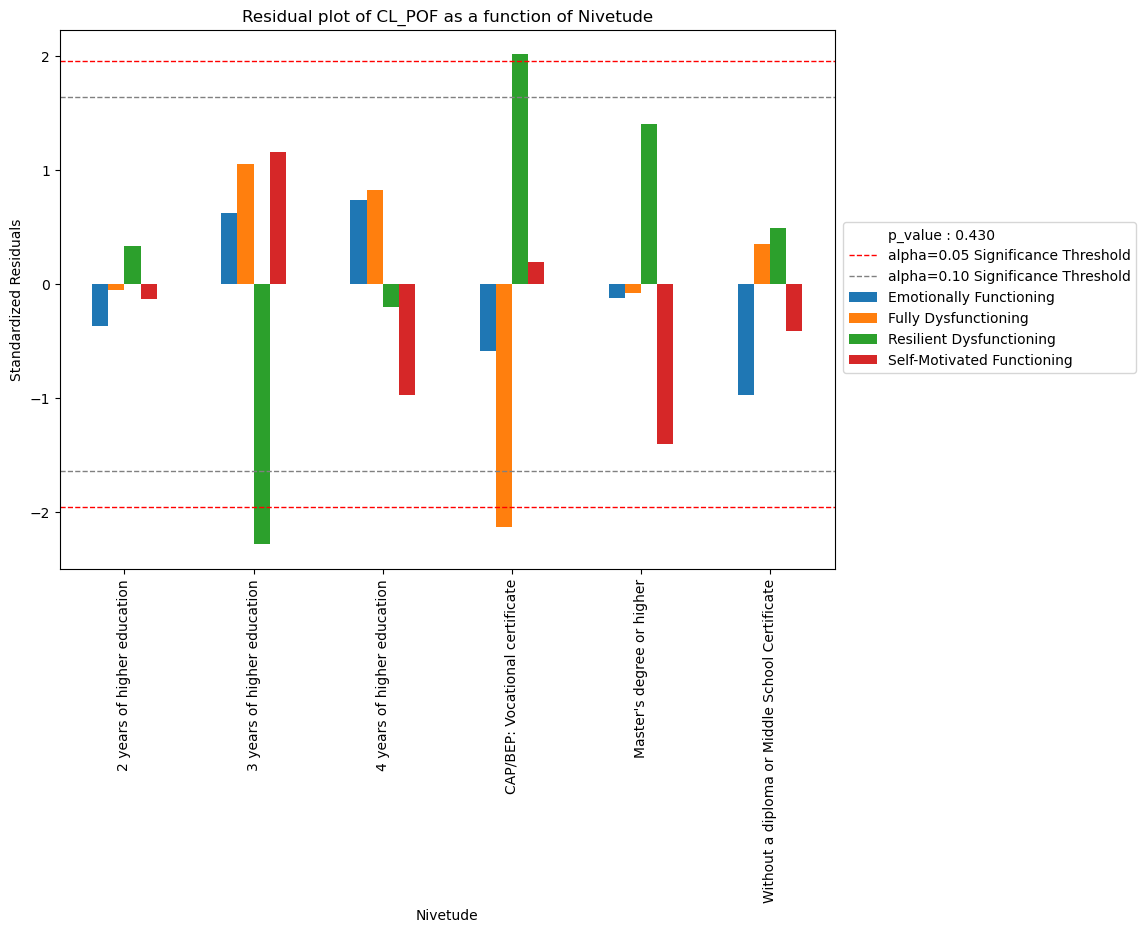

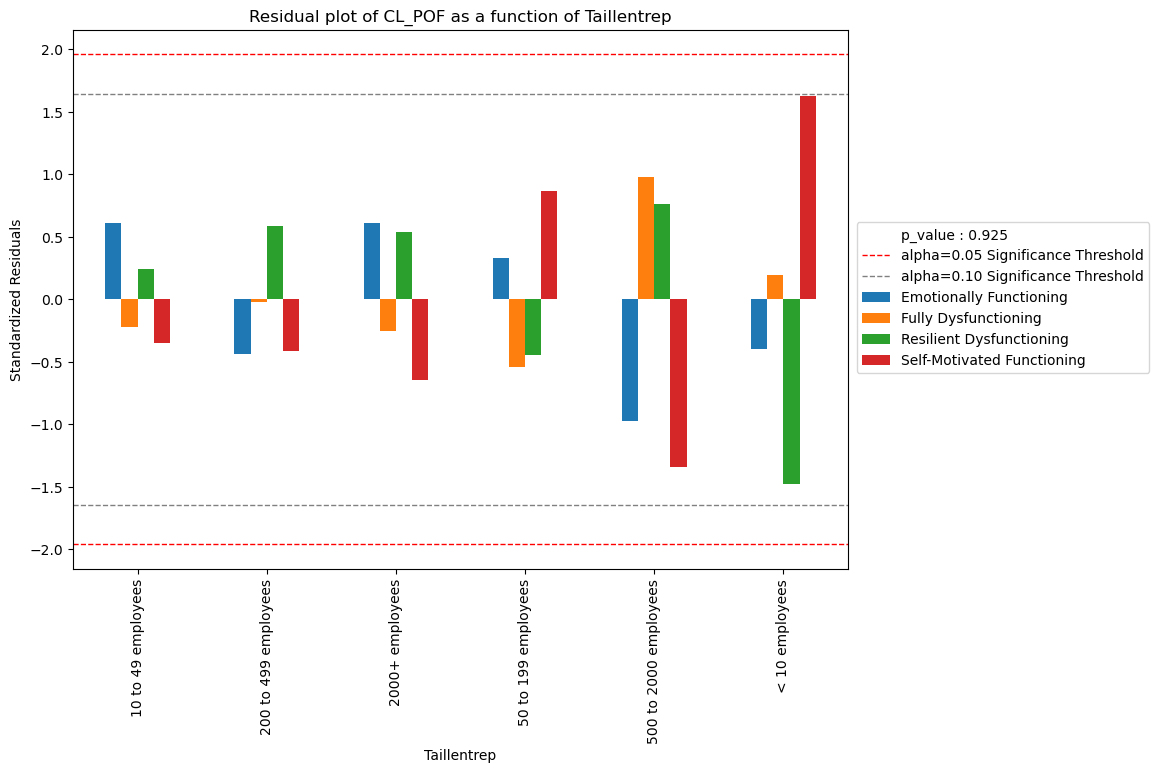

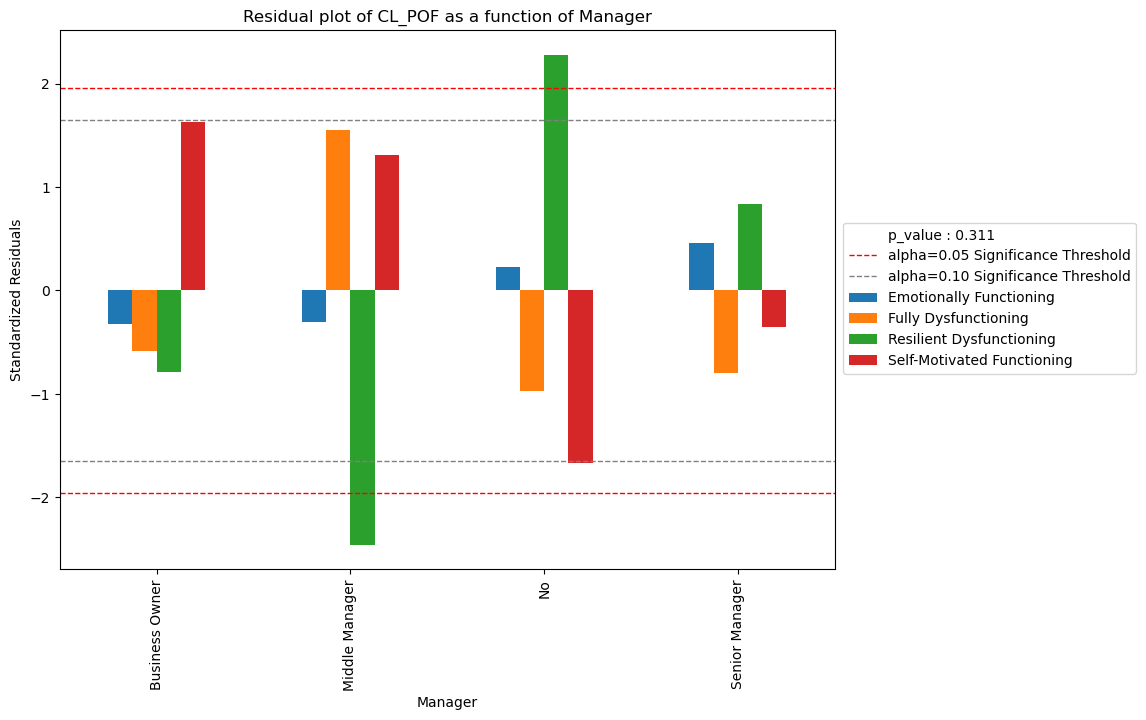

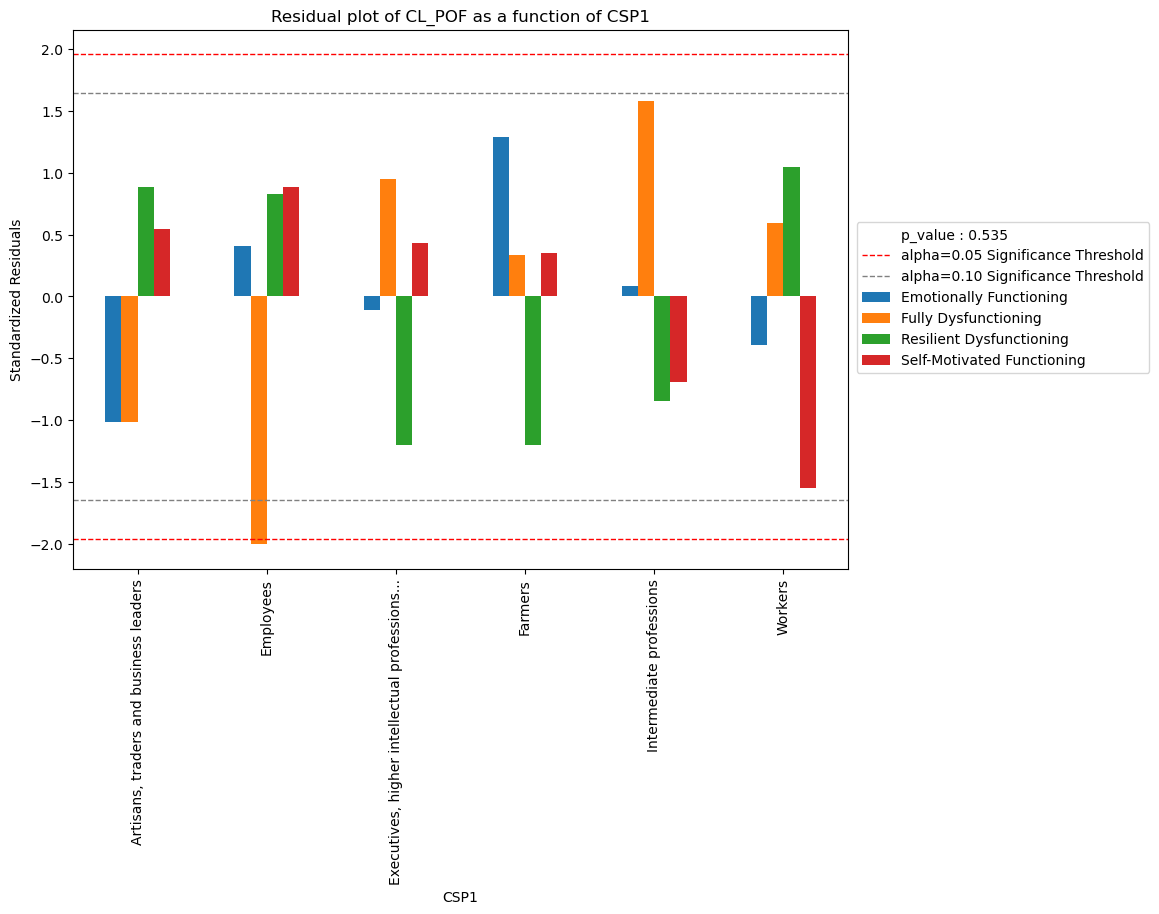

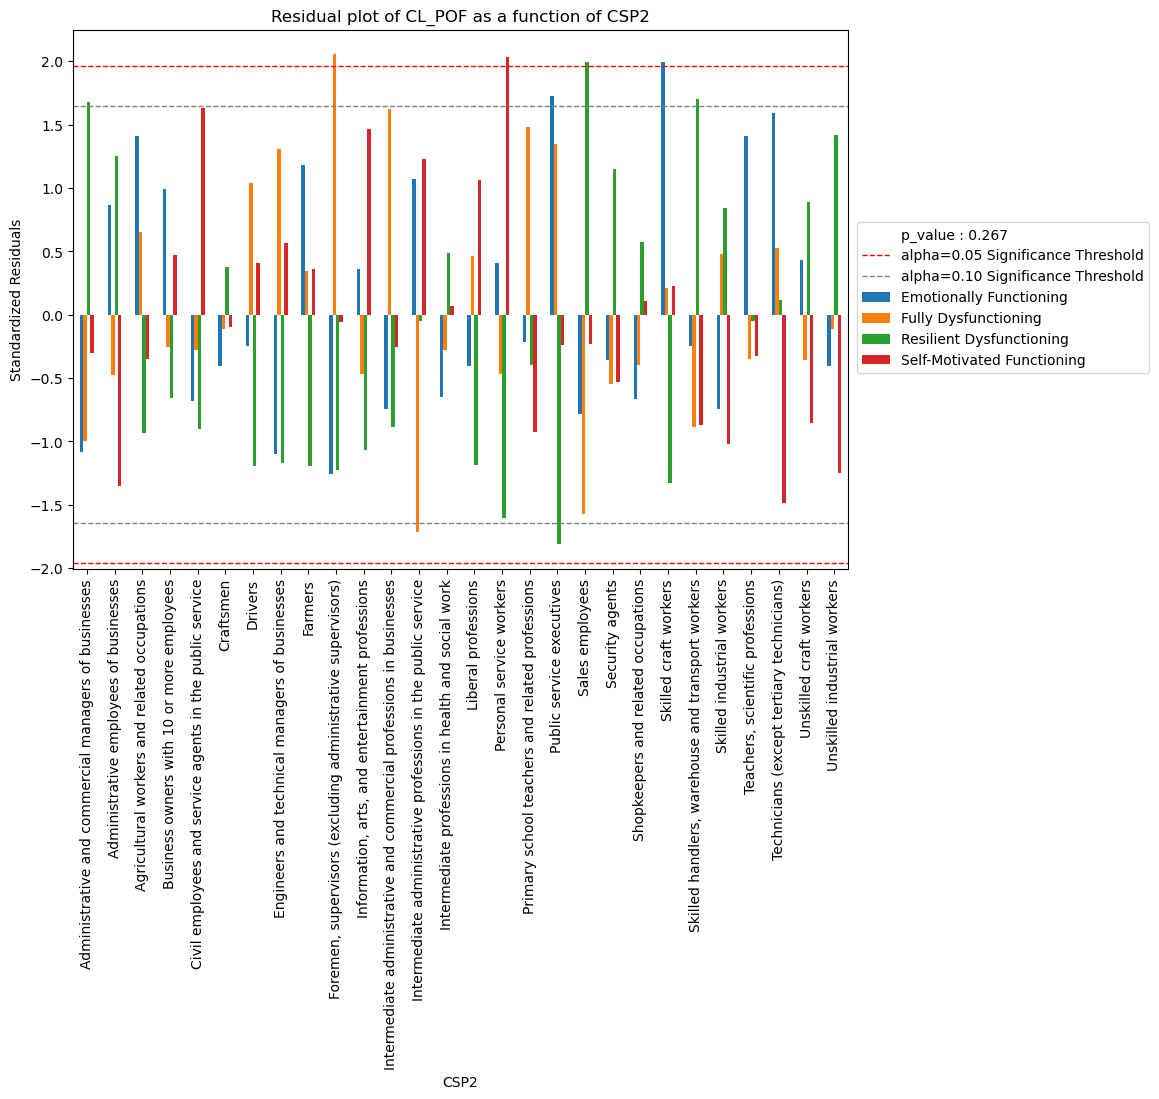

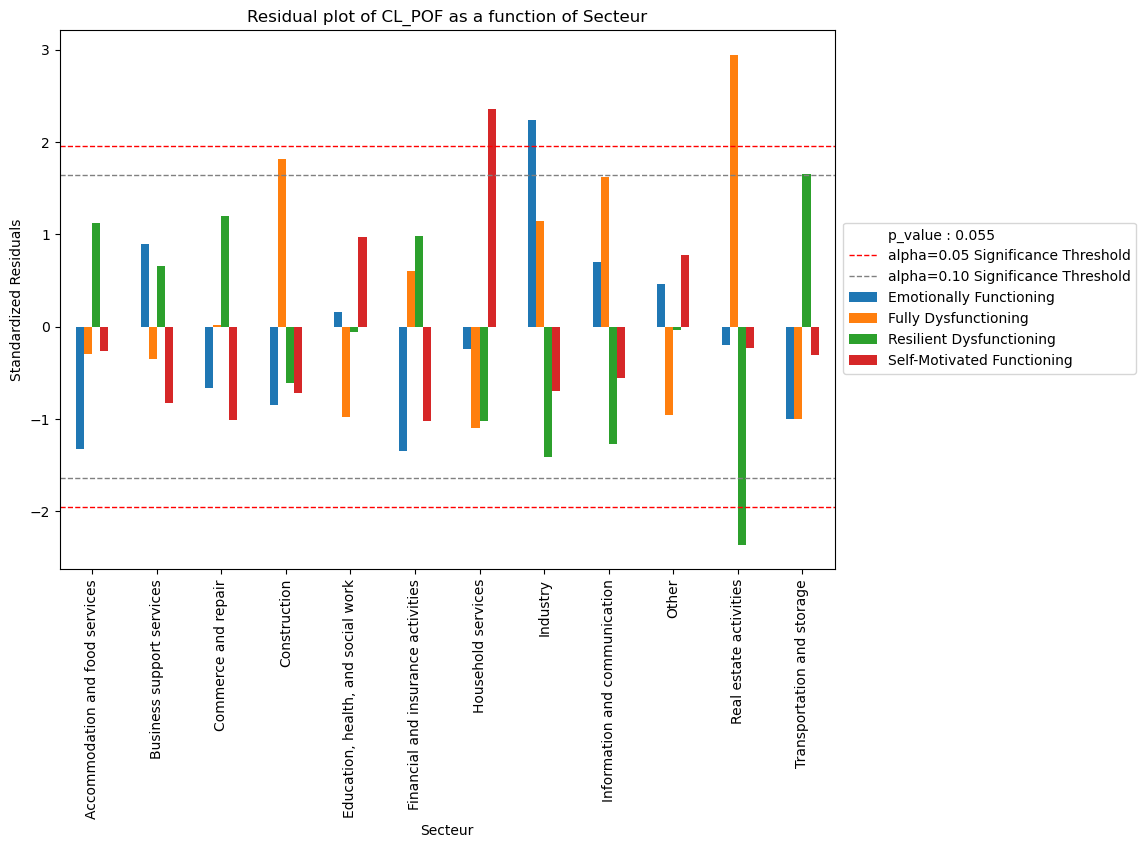

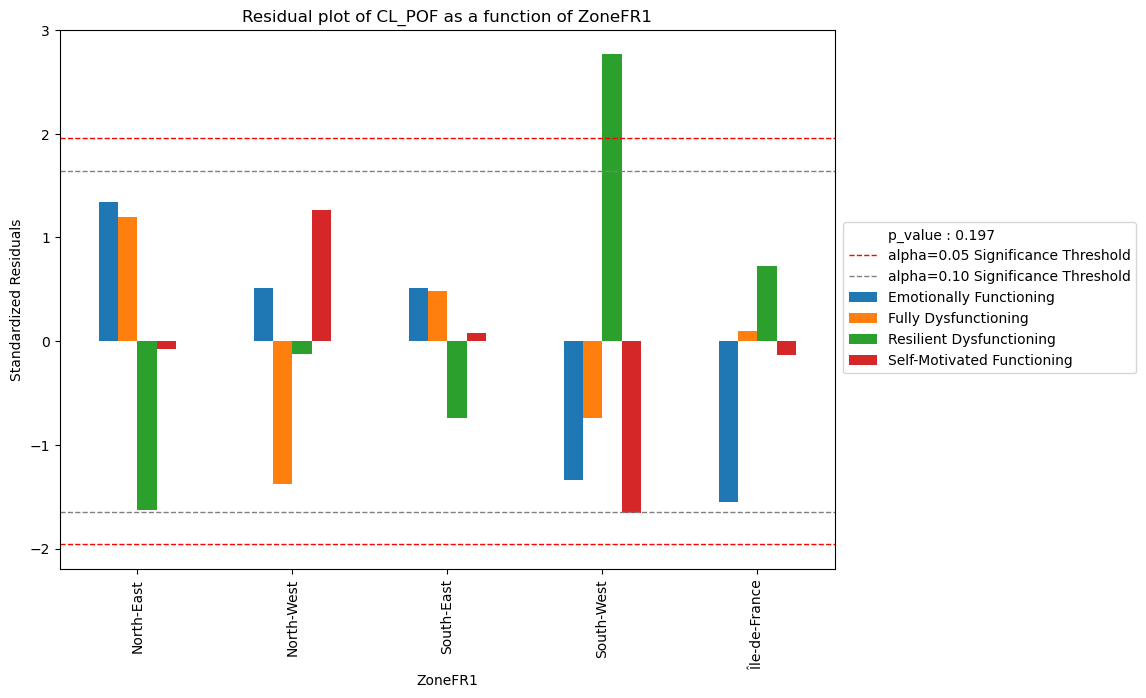

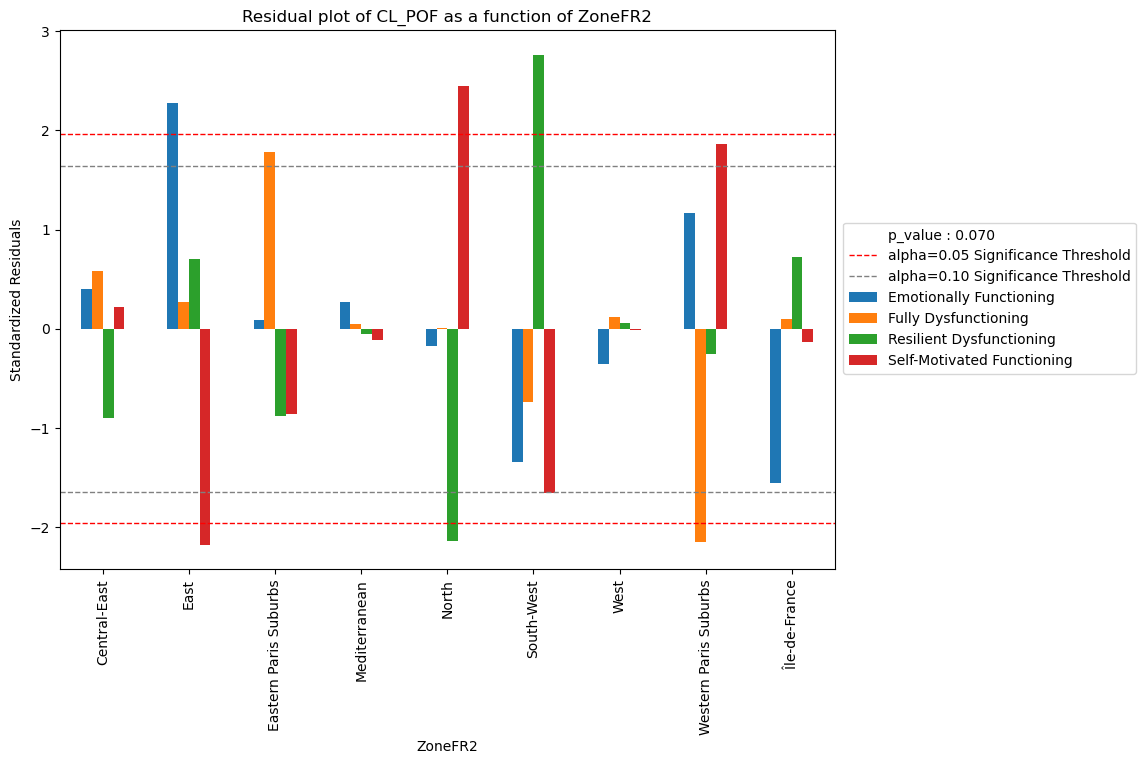

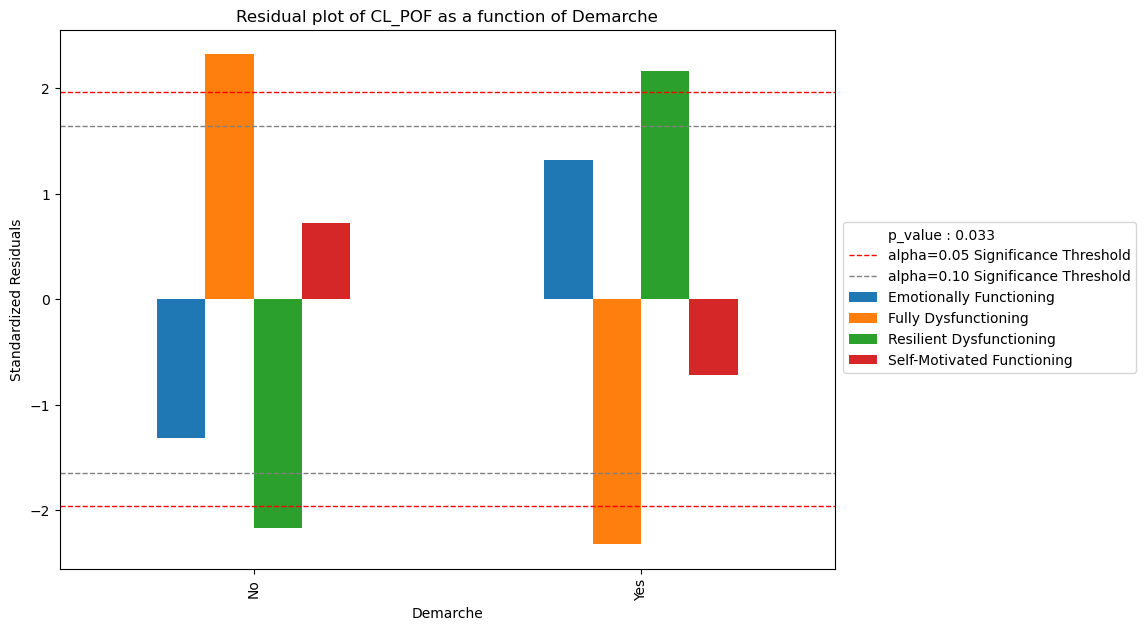

In [50]:
obs_list = []
exp_list = []
res_list = []
chi2_list = []
p_list = []
dof_list = []
for col in socdem_data.columns[:-1] :
    row_var = col
    col_var = 'CL_POF'
    
    X = socdem_data[row_var]
    Y = socdem_data[col_var]

    obs, exp, res, chi2, p, dof = con_table(X,Y)
    obs_list.append(obs)
    exp_list.append(exp)
    res_list.append(res)
    chi2_list.append(chi2)
    p_list.append(p)
    dof_list.append(dof)

    res_plot(res, row_var, col_var)